In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

FILE_PATH = "result_1.csv" 


df  = pd.read_csv(FILE_PATH).drop(['Unnamed: 0'], axis = 1).reset_index(drop = True)

In [62]:
df

,Model,1/2/2024 0:00,1/3/2024 0:00,1/4/2024 0:00,1/5/2024 0:00,1/8/2024 0:00,1/9/2024 0:00,1/10/2024 0:00,1/11/2024 0:00,1/12/2024 0:00,...,12/9/2024 0:00,12/10/2024 0:00,12/11/2024 0:00,12/12/2024 0:00,12/13/2024 0:00,12/16/2024 0:00,12/17/2024 0:00,12/18/2024 0:00,12/19/2024 0:00,12/20/2024 0:00
0,train_Classic_TSMOM,0.0,0.0,0.0,0.0,0.0,0.000000,0.001201,0.001491,-0.001034,...,-0.000051,-0.000172,0.002827,0.000995,0.000996,-0.000713,-0.001773,-0.000582,0.000360,-0.001784
1,train_DTree,0.0,0.0,0.0,0.0,0.0,0.000000,-0.000590,-0.005057,0.005943,...,0.000559,-0.002527,0.001215,0.000610,-0.000338,-0.002431,-0.000550,-0.000360,-0.006484,-0.001517
2,train_Xgboost,0.0,0.0,0.0,0.0,0.0,0.000000,0.001170,-0.002589,0.006398,...,0.001438,-0.001696,-0.001860,-0.000432,0.001218,-0.002908,-0.002999,-0.000084,-0.006955,-0.001769
3,train_MLP Binary,0.0,0.0,0.0,0.0,0.0,0.000000,-0.001049,-0.007538,0.009881,...,0.001386,-0.003974,-0.000370,0.000653,0.001525,-0.004637,-0.004214,0.000022,-0.011173,-0.002928
4,train_Lasso Binary,0.0,0.0,0.0,0.0,0.0,0.000000,-0.001223,-0.006950,0.007128,...,0.001334,-0.003469,-0.000178,0.000117,0.001387,-0.004002,-0.003273,0.000750,-0.009853,-0.002678
5,train_MLP Reg,0.0,0.0,0.0,0.0,0.0,-0.001049,-0.007538,0.009881,-0.005453,...,-0.003478,0.000468,-0.000735,0.001608,-0.001366,-0.002160,0.001244,-0.009680,-0.002625,-0.001367
6,train_Lasso Reg,0.0,0.0,0.0,0.0,0.0,-0.001049,-0.007538,0.009881,-0.005453,...,-0.003613,-0.000111,-0.000962,0.001463,-0.003514,-0.002428,-0.000124,-0.009532,-0.002658,-0.001757
7,train_MLP SharpeLoss,0.0,0.0,0.0,0.0,0.0,-0.000252,-0.004014,0.004948,-0.003292,...,-0.001252,0.000606,0.000089,0.000579,-0.000606,-0.001637,0.000256,-0.004222,-0.001456,-0.000505
8,train_Lasso SharpeLoss,0.0,0.0,0.0,0.0,0.0,-0.001050,-0.007537,0.009878,-0.005451,...,-0.003974,-0.000370,0.000653,0.001525,-0.004637,-0.004217,0.000008,-0.011281,-0.002933,-0.001921


In [63]:
def winrate(pnl, signal,h):
    win_count = lose_count = 0
    company = pnl.columns
    for oo in company:
        flag_h = 0
        for x in range(0,pnl.shape[1]):
            if flag_h != 0:
                flag_h = flag_h - 1
            if signal[oo].iloc[x] == 1:
                if pnl[oo].iloc[x + h -1] > 0: win_count = win_count + 1
                elif pnl[oo].iloc[x + h -1] < 0: lose_count = lose_count + 1
                flag_h = h - 1
            elif signal[oo].iloc[x] == -1:
                if pnl[oo].iloc[x + h -1] < 0: win_count = win_count + 1
                elif pnl[oo].iloc[x + h -1] > 0: lose_count = lose_count + 1
                flag_h = h - 1
    return win_count / (win_count + lose_count) *100

In [64]:
# for k in ["01","03","05","10","15","20","40"]:
#     for h in ["01","03","05","10","15","20","40"]:
#         pnl = pd.read_csv("Main File/TSMOM/Data/target_vol = 0.3/pnl/pnl (k = "+ str(k)+ ", h = " + str(h) + ").csv").set_index('Date')

#         signal = pd.read_csv("Main File/TSMOM/Data/target_vol = 0.3/signal/signal (k = "+ str(k)+ ", h = " + str(h) + ").csv").set_index('Date')

#         temp = winrate(pnl,signal, int(h))
#         try:
#             temp2 = [k,h,temp]
#             stats.loc[len(stats.index)] = temp2
#         except:
#             stats = pd.DataFrame(columns = ["k","h","winrate"])
#             temp2 = [k,h,temp]
#             stats.loc[len(stats.index)] = temp2



### Adding EU_stock for benchmark

In [65]:
import yfinance as yf

tolerance = 0.
k = 1
h = 1

# rule = 'BME'

time_range = '6mo' # khoảng thời gian làm backtest 
start_time = '2023-12-31'
end_time = '2024-12-22'


# Vol scaling
vol_flag = 0                  # Set flag to 1 for vol targeting
if vol_flag == 1:
    target_vol = 0.4 # Can be changed
else:
    target_vol = 'no target vol'


In [66]:
def EU_Index_data():

    stock_list =['^STOXX50E']
    futures = pd.DataFrame(columns= stock_list)

    time_index = list(yf.Ticker(stock_list[0]).history(period = time_range,start = start_time, end = end_time).index)
    flag = 0

    for symbol in stock_list:
        df = yf.Ticker(symbol).history(period = time_range, start = start_time, end = end_time)
        df = pd.DataFrame(df['Close'])
        i = 0
        daily_return = []
        for k in df['Close']:
            if i != 0:
                daily_return.append(float((k-i)/i))
            else:
                daily_return.append(float(0))
            i = k
        if time_index != list(df.index): flag +=1
        try:
            futures[symbol] = daily_return
        except:
            print(symbol)
            print(len(daily_return)) # Check differnet time index
            while len(daily_return) < len(futures):
                daily_return.insert(0,np.nan)
            futures[symbol] = daily_return

    futures.index = time_index
    futures = futures.iloc[1:, :]


    # print(flag) # Check differnet time index

    futures['Date'] = pd.to_datetime(futures.index, format='%Y-%m-%d')
    futures.set_index('Date', inplace=True)

    return futures

In [67]:
EU_50 = EU_Index_data().transpose()

In [68]:
EU_50

Date,2024-01-04 00:00:00+01:00,2024-01-05 00:00:00+01:00,2024-01-08 00:00:00+01:00,2024-01-09 00:00:00+01:00,2024-01-10 00:00:00+01:00,2024-01-11 00:00:00+01:00,2024-01-12 00:00:00+01:00,2024-01-15 00:00:00+01:00,2024-01-16 00:00:00+01:00,2024-01-17 00:00:00+01:00,...,2024-12-09 00:00:00+01:00,2024-12-10 00:00:00+01:00,2024-12-11 00:00:00+01:00,2024-12-12 00:00:00+01:00,2024-12-13 00:00:00+01:00,2024-12-16 00:00:00+01:00,2024-12-17 00:00:00+01:00,2024-12-18 00:00:00+01:00,2024-12-19 00:00:00+01:00,2024-12-20 00:00:00+01:00
^STOXX50E,0.005818,-0.002347,0.004922,-0.004082,0.000405,-0.005975,0.008496,-0.005656,-0.001834,-0.009767,...,0.001543,-0.006764,0.001537,0.001246,0.000487,-0.004211,-0.000899,0.002974,-0.015791,-0.003427


In [69]:
EU_50.mean(axis=1)/EU_50.std(axis=1, ddof = 1)* np.sqrt(252)

^STOXX50E    0.726008
dtype: float64

In [70]:
df

,Model,1/2/2024 0:00,1/3/2024 0:00,1/4/2024 0:00,1/5/2024 0:00,1/8/2024 0:00,1/9/2024 0:00,1/10/2024 0:00,1/11/2024 0:00,1/12/2024 0:00,...,12/9/2024 0:00,12/10/2024 0:00,12/11/2024 0:00,12/12/2024 0:00,12/13/2024 0:00,12/16/2024 0:00,12/17/2024 0:00,12/18/2024 0:00,12/19/2024 0:00,12/20/2024 0:00
0,train_Classic_TSMOM,0.0,0.0,0.0,0.0,0.0,0.000000,0.001201,0.001491,-0.001034,...,-0.000051,-0.000172,0.002827,0.000995,0.000996,-0.000713,-0.001773,-0.000582,0.000360,-0.001784
1,train_DTree,0.0,0.0,0.0,0.0,0.0,0.000000,-0.000590,-0.005057,0.005943,...,0.000559,-0.002527,0.001215,0.000610,-0.000338,-0.002431,-0.000550,-0.000360,-0.006484,-0.001517
2,train_Xgboost,0.0,0.0,0.0,0.0,0.0,0.000000,0.001170,-0.002589,0.006398,...,0.001438,-0.001696,-0.001860,-0.000432,0.001218,-0.002908,-0.002999,-0.000084,-0.006955,-0.001769
3,train_MLP Binary,0.0,0.0,0.0,0.0,0.0,0.000000,-0.001049,-0.007538,0.009881,...,0.001386,-0.003974,-0.000370,0.000653,0.001525,-0.004637,-0.004214,0.000022,-0.011173,-0.002928
4,train_Lasso Binary,0.0,0.0,0.0,0.0,0.0,0.000000,-0.001223,-0.006950,0.007128,...,0.001334,-0.003469,-0.000178,0.000117,0.001387,-0.004002,-0.003273,0.000750,-0.009853,-0.002678
5,train_MLP Reg,0.0,0.0,0.0,0.0,0.0,-0.001049,-0.007538,0.009881,-0.005453,...,-0.003478,0.000468,-0.000735,0.001608,-0.001366,-0.002160,0.001244,-0.009680,-0.002625,-0.001367
6,train_Lasso Reg,0.0,0.0,0.0,0.0,0.0,-0.001049,-0.007538,0.009881,-0.005453,...,-0.003613,-0.000111,-0.000962,0.001463,-0.003514,-0.002428,-0.000124,-0.009532,-0.002658,-0.001757
7,train_MLP SharpeLoss,0.0,0.0,0.0,0.0,0.0,-0.000252,-0.004014,0.004948,-0.003292,...,-0.001252,0.000606,0.000089,0.000579,-0.000606,-0.001637,0.000256,-0.004222,-0.001456,-0.000505
8,train_Lasso SharpeLoss,0.0,0.0,0.0,0.0,0.0,-0.001050,-0.007537,0.009878,-0.005451,...,-0.003974,-0.000370,0.000653,0.001525,-0.004637,-0.004217,0.000008,-0.011281,-0.002933,-0.001921


In [71]:
def cummulative_returning(data):
    return  (data.iloc[:,1:] + 1).cumprod(axis = 1).iloc[:,-1]

def annualise_return(data):
    return (cummulative_returning(data))**(252/ (data.shape[1] - 1)) - 1

def sharpe_ratio(data):
    return (data.iloc[:,11:].mean(axis=1)/data.iloc[:,11:].std(axis=1, ddof = 1))* np.sqrt(252)

def maximum_drawdown(data):
    cumulative = (data.iloc[:,1:] + 1).cumprod(axis = 1)
    max_return = cumulative.cummax(axis = 1)
    return cumulative.sub(max_return).div(max_return).min(axis = 1)

def calmar_ratio(data):
    return annualise_return(data)/ -maximum_drawdown(data)

def sortino_ratio(df):
    k = df.iloc[:,11:] > 0
    x= df.iloc[:,11:]
    x[k] = 0.0
    x = np.square(x)
    x = np.nanmean(x, axis=1)
    x = np.sqrt(x) * np.sqrt(252)
    x
    y = np.nanmean(df.iloc[:,11:], axis=1)
    return y/x * np.sqrt(252)

def estimated_return(data):
    return data.iloc[:,11:].mean(axis=1)


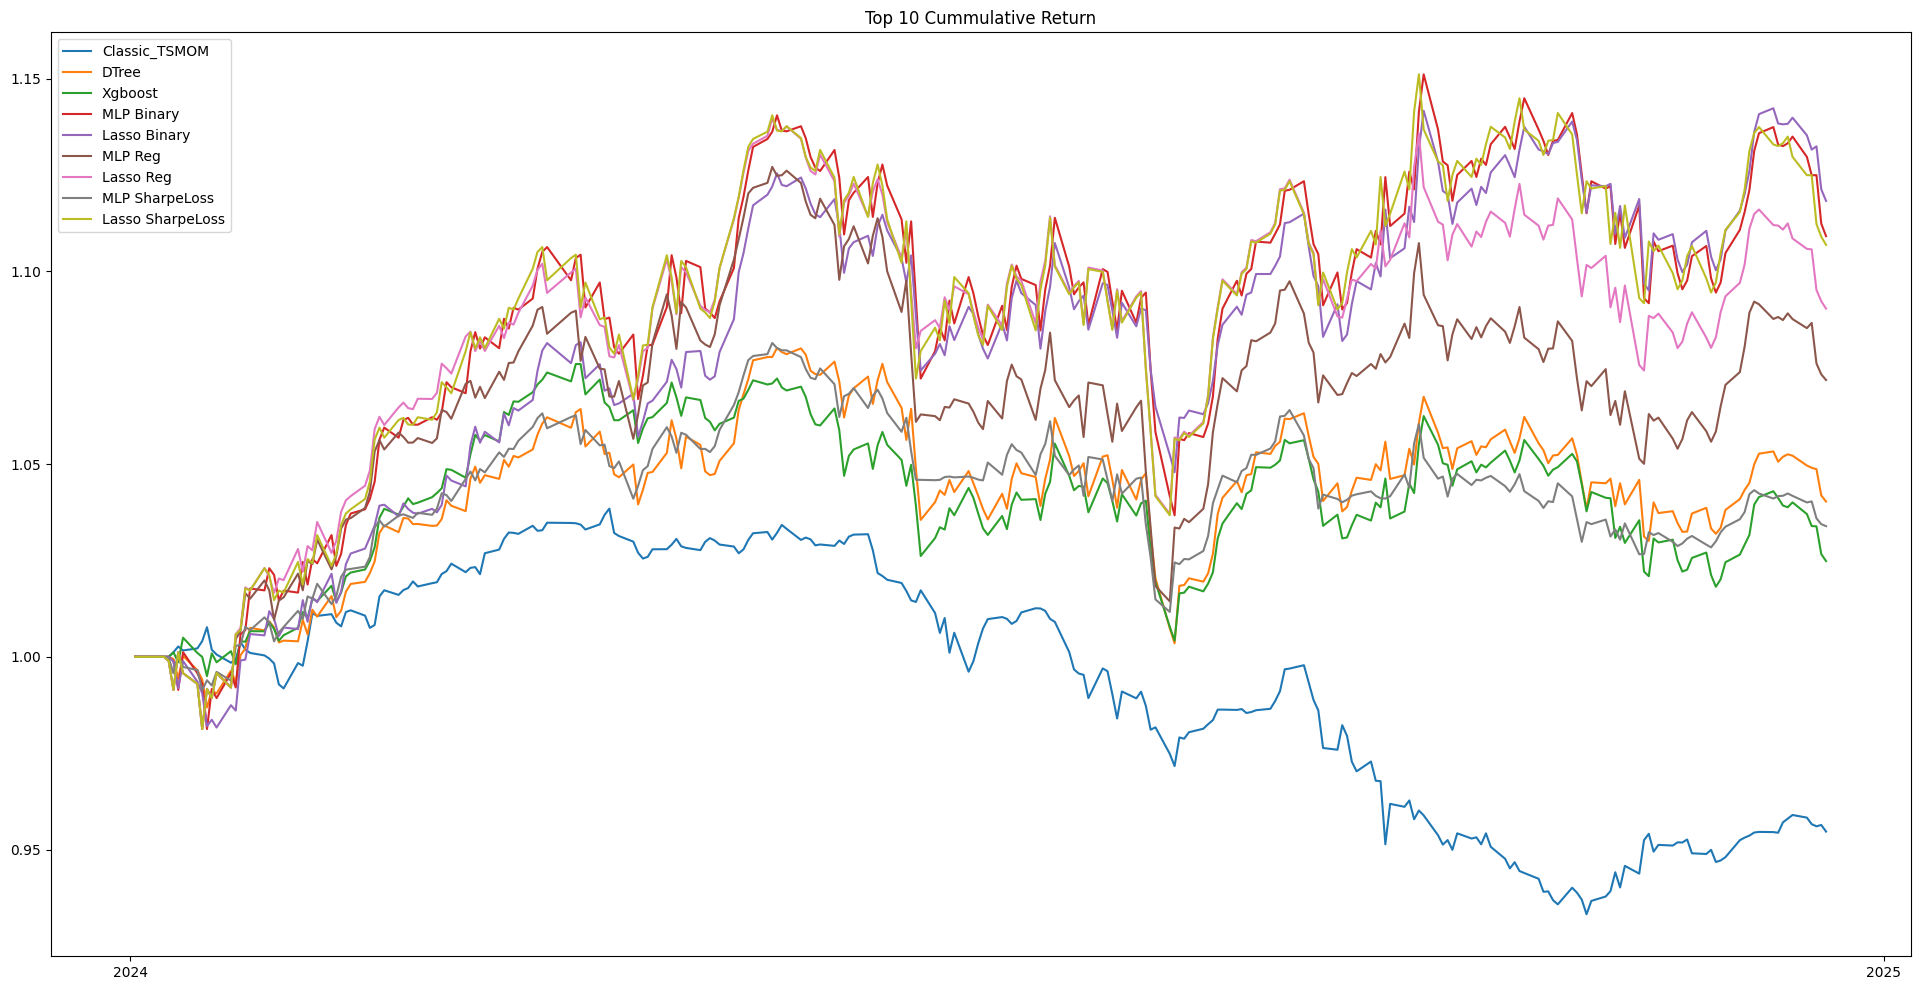

In [72]:
cummulative_return = (df.iloc[:,1:] + 1).cumprod(axis = 1).reset_index(drop= True)

cummulative_return.columns = pd.to_datetime(cummulative_return.columns)
fig, ax = plt.subplots(figsize=(24, 12))
for x in range(0,64):
    try:
        ax.plot(cummulative_return.loc[x], label = df.loc[x]["Model"][6:])
        ax.legend()
    except: pass
plt.title('Top 10 Cummulative Return')

ax.xaxis.set_major_locator(mdates.YearLocator())
plt.show()

In [73]:
cummulative_return = (df.iloc[:,2:] + 1).cumprod(axis = 1)

cummulative_return.columns = pd.to_datetime(cummulative_return.columns)

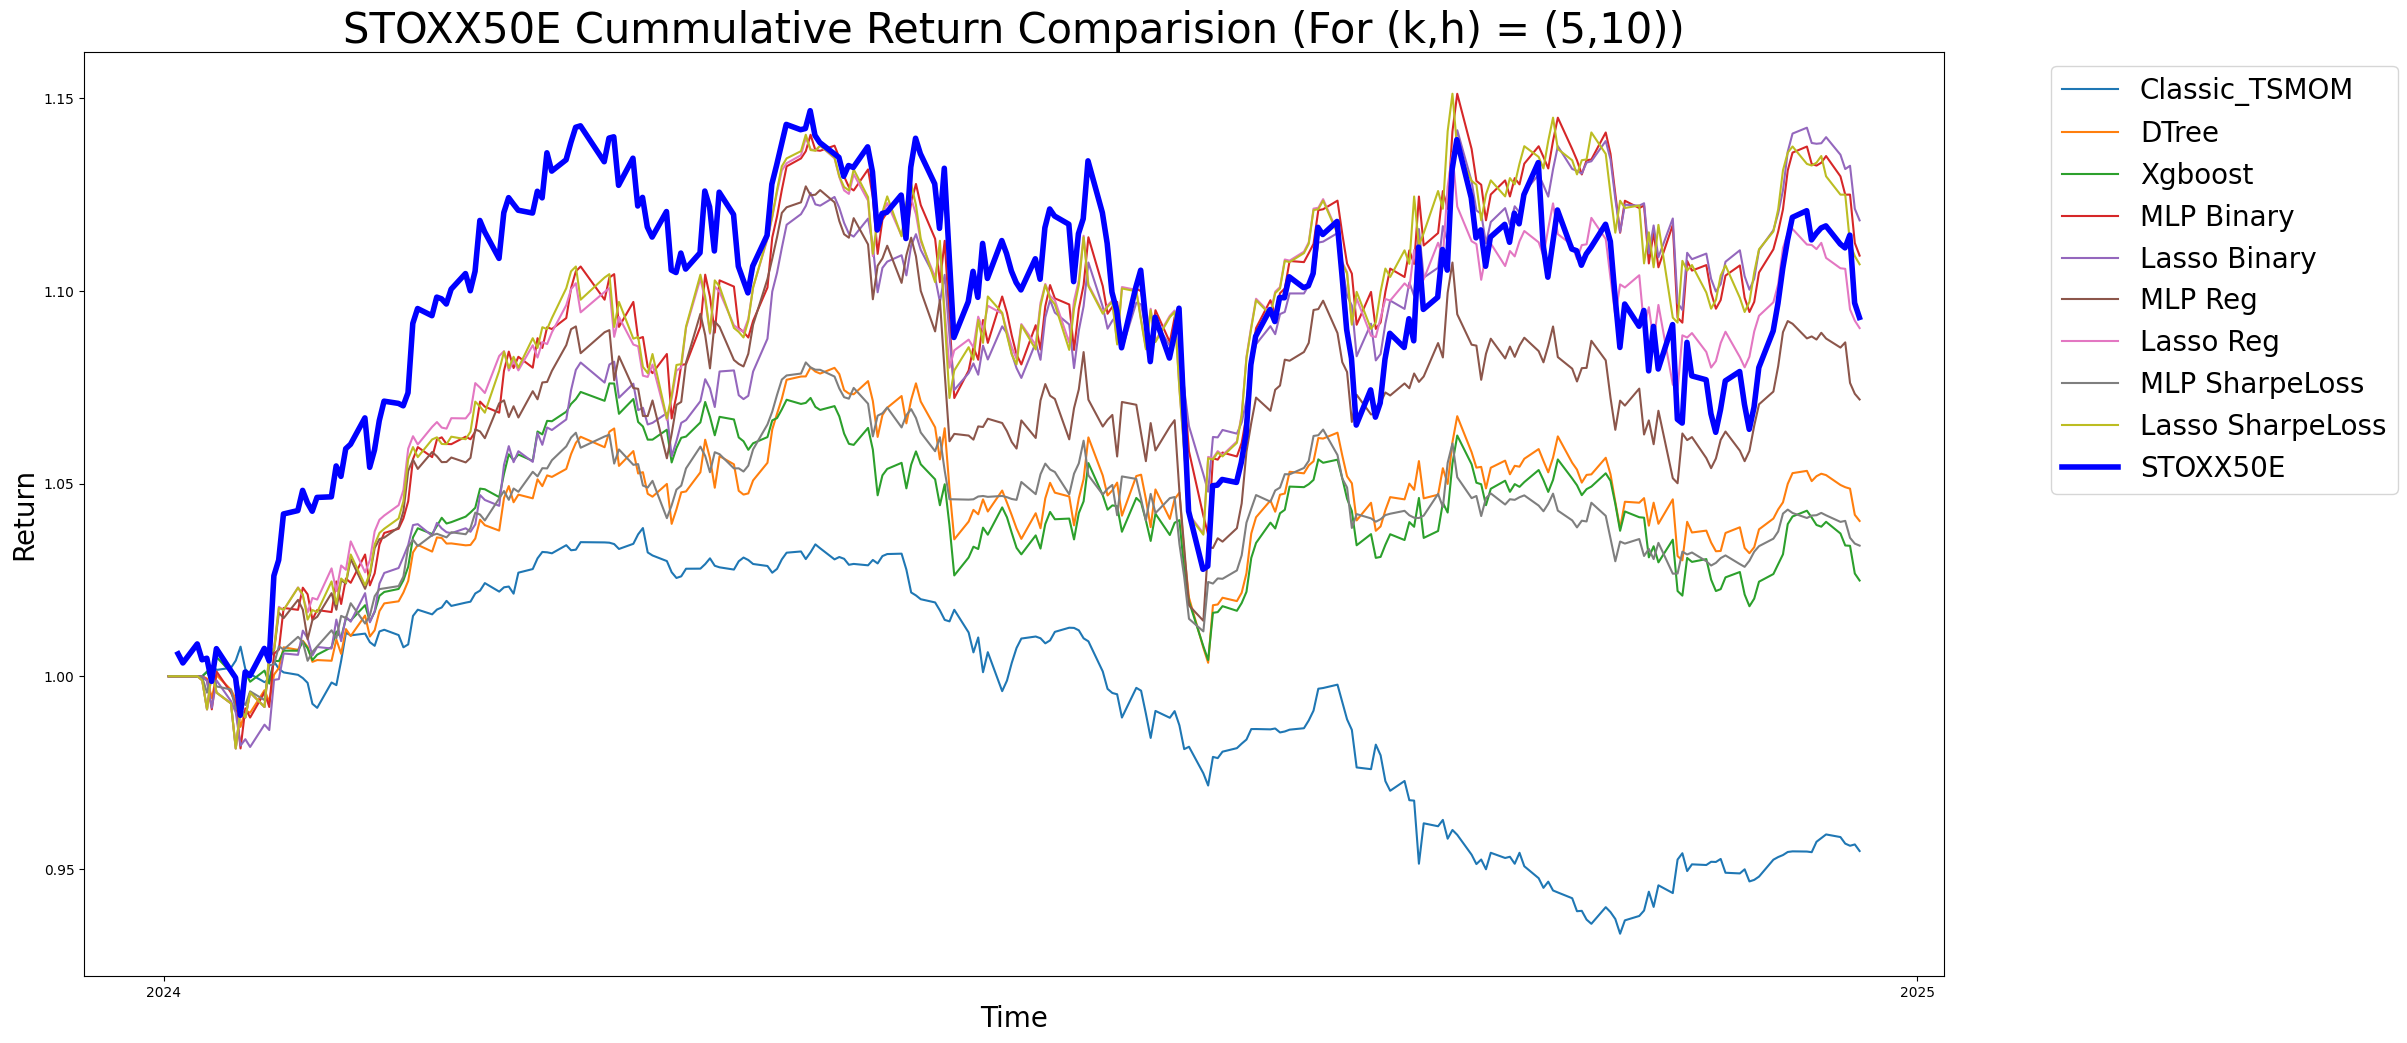

In [74]:
fig, ax = plt.subplots(figsize=(24, 12))

benchmark = (EU_50+1).cumprod(axis = 1).loc['^STOXX50E']

cummulative_return = (df.iloc[:,1:] + 1).cumprod(axis = 1).reset_index(drop= True)

cummulative_return.columns = pd.to_datetime(cummulative_return.columns)

for x in range(0,64):
    try:
        ax.plot(cummulative_return.loc[x], label = df.loc[x]["Model"][6:])
        ax.legend()
    except: pass

ax.xaxis.set_major_locator(mdates.YearLocator())

ax.plot(benchmark, color = 'Blue', linewidth = 4., label = 'STOXX50E')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 20)

ax.set_xlabel("Time", fontsize = 20)
ax.set_ylabel("Return", fontsize = 20)


plt.title('STOXX50E Cummulative Return Comparision (For (k,h) = (5,10))', fontsize = 30)
plt.show()


In [75]:
cummulative_return

,2024-01-02,2024-01-03,2024-01-04,2024-01-05,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-15,...,2024-12-09,2024-12-10,2024-12-11,2024-12-12,2024-12-13,2024-12-16,2024-12-17,2024-12-18,2024-12-19,2024-12-20
0,1.0,1.0,1.0,1.0,1.0,1.000000,1.001201,1.002694,1.001658,1.002193,...,0.954527,0.954363,0.957062,0.958013,0.958968,0.958284,0.956584,0.956028,0.956372,0.954666
1,1.0,1.0,1.0,1.0,1.0,1.000000,0.999410,0.994355,1.000264,0.996521,...,1.053298,1.050636,1.051912,1.052554,1.052198,1.049640,1.049062,1.048684,1.041885,1.040304
2,1.0,1.0,1.0,1.0,1.0,1.000000,1.001170,0.998579,1.004968,1.001003,...,1.042964,1.041195,1.039258,1.038809,1.040075,1.037050,1.033940,1.033853,1.026662,1.024846
3,1.0,1.0,1.0,1.0,1.0,1.000000,0.998951,0.991421,1.001217,0.995757,...,1.137449,1.132929,1.132510,1.133249,1.134978,1.129715,1.124955,1.124979,1.112410,1.109154
4,1.0,1.0,1.0,1.0,1.0,1.000000,0.998777,0.991836,0.998906,0.993554,...,1.142336,1.138373,1.138170,1.138303,1.139882,1.135321,1.131605,1.132453,1.121296,1.118293
5,1.0,1.0,1.0,1.0,1.0,0.998951,0.991421,1.001217,0.995757,0.992971,...,1.087667,1.088175,1.087376,1.089125,1.087637,1.085287,1.086637,1.076119,1.073294,1.071827
6,1.0,1.0,1.0,1.0,1.0,0.998951,0.991421,1.001217,0.995757,0.992971,...,1.112027,1.111904,1.110834,1.112459,1.108550,1.105859,1.105722,1.095182,1.092271,1.090352
7,1.0,1.0,1.0,1.0,1.0,0.999748,0.995735,1.000662,0.997367,0.996581,...,1.041067,1.041699,1.041792,1.042395,1.041764,1.040059,1.040325,1.035933,1.034424,1.033902
8,1.0,1.0,1.0,1.0,1.0,0.998950,0.991421,1.001214,0.995756,0.992970,...,1.132941,1.132521,1.133261,1.134989,1.129727,1.124963,1.124972,1.112281,1.109019,1.106889


In [76]:
df_benchmark = pd.DataFrame()

df_benchmark['model'] = [x[6:] if x != 'classic_TSMOM' else x for x in df['Model']]

df_benchmark['cum_return'] = cummulative_returning(df)
df_benchmark['model_vs_index']= (cummulative_returning(df) / float((EU_50+1).cumprod(axis = 1).iloc[:,-1]) - 1)*100               
df_benchmark['annual_return'] = annualise_return(df)
df_benchmark['sharpe_ratio'] =  sharpe_ratio(df)
df_benchmark['max_drawdown'] = maximum_drawdown(df)

df_benchmark['calmar_ratio'] = calmar_ratio(df)

# df_benchmark['E[Returns]'] = estimated_return(df)

df_benchmark

C:\Users\hungl\AppData\Local\Temp\ipykernel_15104\798326615.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_benchmark['model_vs_index']= (cummulative_returning(df) / float((EU_50+1).cumprod(axis = 1).iloc[:,-1]) - 1)*100


,model,cum_return,model_vs_index,annual_return,sharpe_ratio,max_drawdown,calmar_ratio
0,Classic_TSMOM,0.954666,-12.664853,-0.045334,-0.928037,-0.101360,-0.447255
1,DTree,1.040304,-4.830544,0.040304,0.608181,-0.070949,0.568064
2,Xgboost,1.024846,-6.244617,0.024846,0.387283,-0.066708,0.372465
3,MLP Binary,1.109154,1.468018,0.109154,1.055061,-0.090990,1.199620
4,Lasso Binary,1.118293,2.304116,0.118293,1.362510,-0.068893,1.717055
5,MLP Reg,1.071827,-1.946712,0.071827,0.853886,-0.100009,0.718206
6,Lasso Reg,1.090352,-0.251946,0.090352,1.000874,-0.089998,1.003933
7,MLP SharpeLoss,1.033902,-5.416174,0.033902,0.670628,-0.064528,0.525380
8,Lasso SharpeLoss,1.106889,1.260874,0.106889,1.062223,-0.090988,1.174760


In [77]:
df_benchmark

,model,cum_return,model_vs_index,annual_return,sharpe_ratio,max_drawdown,calmar_ratio
0,Classic_TSMOM,0.954666,-12.664853,-0.045334,-0.928037,-0.101360,-0.447255
1,DTree,1.040304,-4.830544,0.040304,0.608181,-0.070949,0.568064
2,Xgboost,1.024846,-6.244617,0.024846,0.387283,-0.066708,0.372465
3,MLP Binary,1.109154,1.468018,0.109154,1.055061,-0.090990,1.199620
4,Lasso Binary,1.118293,2.304116,0.118293,1.362510,-0.068893,1.717055
5,MLP Reg,1.071827,-1.946712,0.071827,0.853886,-0.100009,0.718206
6,Lasso Reg,1.090352,-0.251946,0.090352,1.000874,-0.089998,1.003933
7,MLP SharpeLoss,1.033902,-5.416174,0.033902,0.670628,-0.064528,0.525380
8,Lasso SharpeLoss,1.106889,1.260874,0.106889,1.062223,-0.090988,1.174760


In [78]:
df_benchmark.round(3).to_csv('benchmark.csv')